# Problem Set 5, due March 9 at 6:00 pm.

As usual, you are highly encouraged to *start this problem set early!*  My best guess (no guarantees!) is that Part 1 will be conceptually easy but perhaps time consuming.  Parts 2 and 3 are medium difficult, but there are plenty of opportunities to get confused with python data structures, so if you're going to get stuck, get stuck (and unstuck) early! Part 4 will give you an opportunity to get some intuition with PCA.

Note that the two extra credit problems have the potential to be quite challenging and time consuming. Make sure to do everything else in the problem set before you tackle the extra credit.

To get started, download the files "reviews.csv" and "movies.dat" from Canvas.

For this assignment, the following libraries may be useful:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [scikit-learn](http://scikit-learn.org/stable/), for machine learning
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

In particular, I suggest you familiarize yourself with the following aspects of these libraries, which are not required but which might make your life easier:

* `DataFrame` and other basic [data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) in pandas
* [`groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html), `unique`,  and other simple aggregation functions
* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for working with text in sklearn.
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for Naive Bayes
* Simple tools for [Cross-Validation](http://scikit-learn.org/stable/modules/cross_validation.html) in sklearn

Make sure they load properly with the following code block:

In [1]:
# Student Name - Charudatta Deshpande
#
# Collaborators - Ram Ganesan, Charles Hemstreet, Mehdi Muntazir, Manas Thakre
#
#############################################
# Import required libraries.                # 
#############################################
#
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
#hint: Consult the scikit-learn documentation to
#      learn about what these classes do do
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import codecs, re, time
from itertools import chain
import seaborn as sns
import os as os 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
import time
import math
from sklearn.model_selection import KFold 
os.chdir('C:\\Users\deshc\Desktop\MS Stuff\Winter 2018\INFX 574 Data Science 2\Problem Set 5')

C:\Users\deshc\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Introduction to the assignment

In this assignment, you'll be analyzing movie reviews in an attempt to determine whether movies are good or bad.  I've downloaded a large number of movie reviews from the [Rotten Tomatoes](http://www.rottentomatoes.com) website, which are available in the file "reviews.csv" on Canvas.  I've also put a file "movies.dat" on Canvas that contains metadata for ~65,000 different movies

If you've never seen Rotten Tomatoes before, go spend a few minutes familiarizing yourself with the website.  It's a meta-review website that aggregates movie reviews from a large number of critics.  Here's what the page for this year's likely [Oscar winner](http://www.rottentomatoes.com/m/the_revenant_2015/) looks like.  Note in particular the section on "Critic Reviews" at the bottom -- that's the content that has been scraped and put in the reviews.csv file.  Also note that each movie is given a quantitative score on the Tomatometer which is used to classify the movie as either Fresh (good) or Rotten (bad).

Your mission is to develop a classifier to determine whether a movie is Fresh or Rotten based on the contents of the reviews given to the movie.  As usual, we'll start out with some exploratory data analysis.

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data:

In [2]:
reviews = pd.read_csv('reviews.csv')
movies = pd.read_csv("movies.dat", delimiter='\t')

reviews = reviews[~reviews.quote.isnull()]
reviews = reviews[reviews.fresh != 'none']
reviews = reviews[reviews.quote.str.len() > 0]

### 1.1: Basic features of the dataset

Answer the following questions by having your python code directly print the answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [3]:
#
# Charu's code below. 
#
# First, drop rows with no reviewer name
reviews = reviews[~reviews.critic.isnull()]

print('Number of reviews: %i' % len(reviews))
print('Number of unique reviews - reviews dataset: %i' % len(reviews.quote.unique()))
print('Number of unique reviewers (critics) - reviews dataset: %i' % len(reviews.critic.unique()))
print('Number of unique movies - reviews dataset: %i' % len(reviews.rtid.unique()))
print('Number of unique movies - movies dataset: %i' % len(movies.imdbID.unique()))
print('Number of unique/different publications - reviews dataset: %i' % len(reviews.publication.unique()))


Number of reviews: 12718
Number of unique reviews - reviews dataset: 12149
Number of unique reviewers (critics) - reviews dataset: 540
Number of unique movies - reviews dataset: 1715
Number of unique movies - movies dataset: 9423
Number of unique/different publications - reviews dataset: 64


### 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

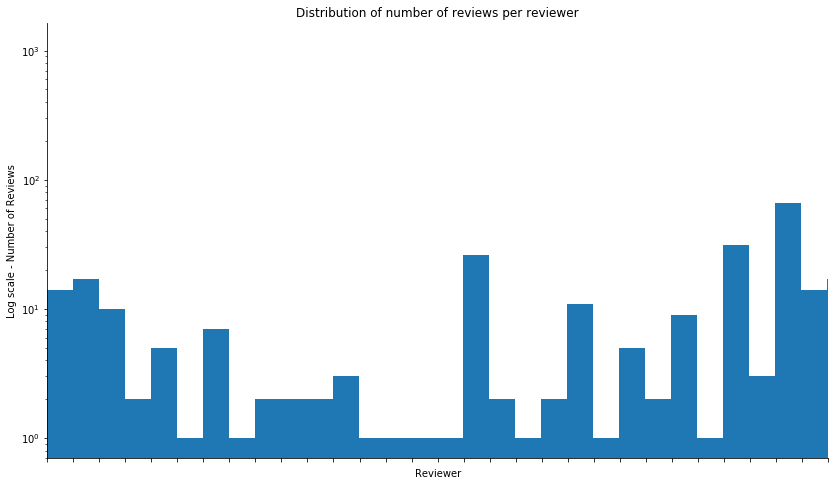

In [4]:
#
#Charu's code 
#
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
plt.title("Distribution of number of reviews per reviewer")
plt.xlabel("Reviewer")
plt.ylabel("Log scale - Number of Reviews")
plt.xlim(xmin=0, xmax = 30)
plt.yscale('log', nonposy='clip')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axes.xaxis.set_ticklabels([])
ax.hist(reviews.critic, bins=len(reviews.critic.unique()), edgecolor = 'none')
plt.show()

### 1.3 Zoom in on a few reviewers
Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function to do this quickly*

In [5]:
#
# Charu's answer - 
# First add a counts column based on number of reviews from a critic
# Then sort the dataset by counts descending, critic name ascending, review date ascending.
# Create two dataframes, and select first and last records in them based on sort
# criteria. 
#
reviews.frame1 = pd.DataFrame()
reviews.frame2 = pd.DataFrame()
reviews['review_count'] = reviews.groupby(['critic'])['quote'].transform('count')
reviews.frame1 = reviews.frame1.append(reviews.sort_values(['review_count', 'review_date', 'critic'], 
                                    ascending=[False, True, True]).groupby(['critic', 'review_count']).first())
reviews.frame2 = reviews.frame2.append(reviews.sort_values(['review_count', 'review_date', 'critic'], 
                                    ascending=[False, True, True]).groupby(['critic', 'review_count']).last())
reviews.frame1 = reviews.frame1.rename(columns={'review_date': 'review_date_first'})
reviews.frame2 = reviews.frame2.rename(columns={'review_date': 'review_date_last'})
reviews.frame1 = reviews.frame1.reset_index()
reviews.frame1 = reviews.frame1.sort_values(['review_count'], ascending=[False])
reviews.frame1 = reviews.frame1.reset_index()
reviews.frame1 = reviews.frame1.drop(reviews.frame1.columns[[3, 4, 5, 7, 9, 10]], axis=1)
reviews.frame1 = reviews.frame1.drop('index', axis=1)
reviews.frame1 = reviews.frame1.head(30)
#
reviews.frame2 = reviews.frame2.reset_index()
reviews.frame2 = reviews.frame2.sort_values(['review_count'], ascending=[False])
reviews.frame2 = reviews.frame2.reset_index()
reviews.frame2 = reviews.frame2.drop(reviews.frame2.columns[[3, 4, 5, 7, 9, 10]], axis=1)
reviews.frame2 = reviews.frame2.drop('index', axis=1)
reviews.frame2 = reviews.frame2.head(30)
# 
# Join the two dataframes to create a single frame with required columns
# 
cols_to_use = reviews.frame2.columns.difference(reviews.frame1.columns)
cols_to_use
top_30_reviewers = pd.merge(reviews.frame1, reviews.frame2[cols_to_use], left_index=True, right_index=True, how='outer')
#
# The contents of final dataframe top_30_reviewers provide the answer for this question. 
#
print(top_30_reviewers)

                critic  review_count              publication  \
0          Roger Ebert          1150        Chicago Sun-Times   
1   James Berardinelli           833                ReelViews   
2         Janet Maslin           526           New York Times   
3        Variety Staff           449                  Variety   
4   Jonathan Rosenbaum           420           Chicago Reader   
5       Desson Thomson           373          Washington Post   
6         Geoff Andrew           361                 Time Out   
7            Dave Kehr           360           Chicago Reader   
8        Kenneth Turan           282        Los Angeles Times   
9         Mick LaSalle           280  San Francisco Chronicle   
10     Owen Gleiberman           241     Entertainment Weekly   
11        Rita Kempley           236          Washington Post   
12         Joe Baltake           231           Sacramento Bee   
13       Todd McCarthy           223                  Variety   
14       Vincent Canby   

### 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in orange showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

In [6]:
#
# Charu's answer - 
# 
# - First drop rows with invalid values
# 
movies = movies[~movies.rtAllCriticsRating.isnull()]
movies = movies[movies.rtAllCriticsRating != 'none']
movies = movies[movies.rtAllCriticsRating != '0']
movies = movies[movies.rtAllCriticsRating != '\\N']
movies = movies[movies.rtAllCriticsRating.str.len() > 0]
movies = movies[~movies.year.isnull()]
movies = movies[movies.year > 1910]
movies['rtAllCriticsRating'] = movies['rtAllCriticsRating'].astype('float64') 
#

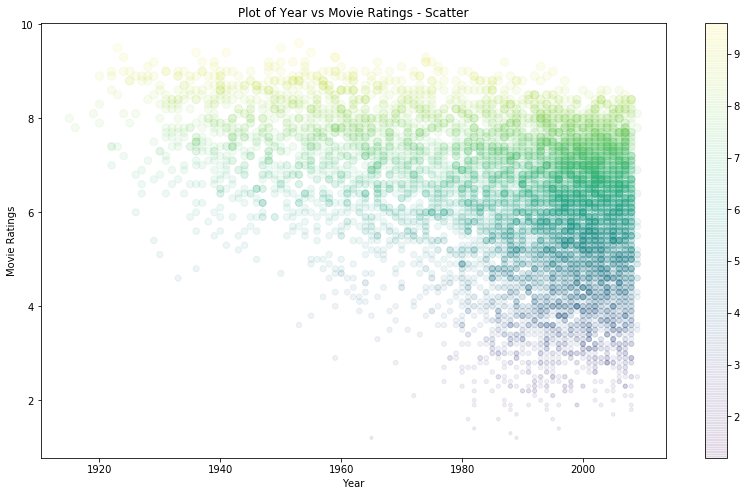

In [7]:
# 
# First, plot a scatter plot as specified. 
# Color and sizes vary with rating. 
#
fig = plt.gcf()
fig.set_size_inches(14, 8)
sizes = 8*movies.rtAllCriticsRating
plt.title("Plot of Year vs Movie Ratings - Scatter")
plt.xlabel("Year")
plt.ylabel("Movie Ratings")
plt.scatter(movies.year, movies.rtAllCriticsRating, alpha=0.08, c=movies.rtAllCriticsRating, s=sizes)
plt.colorbar()
plt.show()

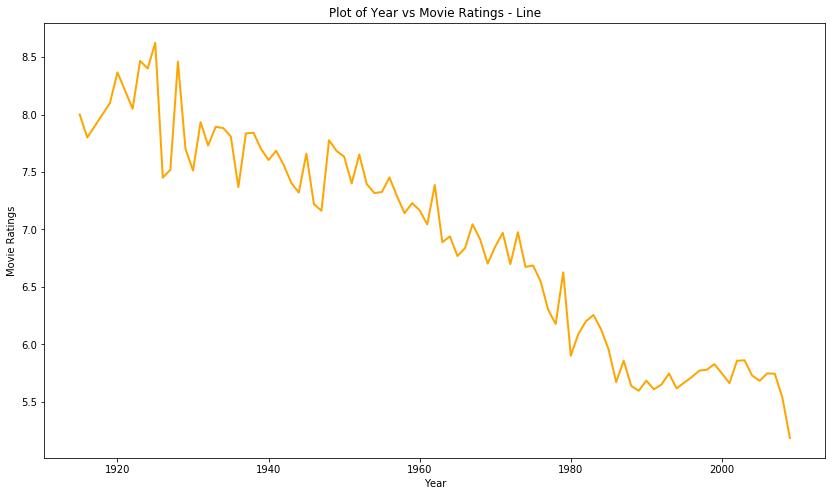

In [8]:
# 
# Next, group data by year and average ratings and reset index
#
movies.grouped = movies.groupby(['year']).mean().reset_index()
movies.grouped.head()
fig = plt.gcf()
fig.set_size_inches(14, 8)
plt.title("Plot of Year vs Movie Ratings - Line")
plt.xlabel("Year")
plt.ylabel("Movie Ratings")
plt.plot(movies.grouped.year, movies.grouped.rtAllCriticsRating, linewidth=2, c='orange')

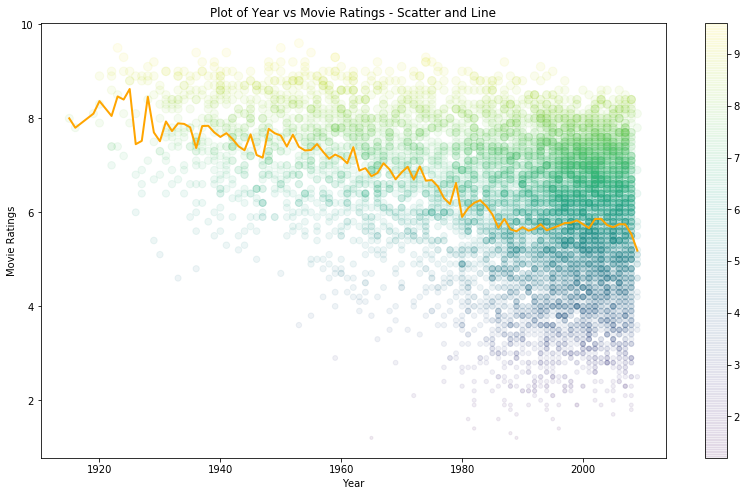

In [9]:
# 
# Finally, merge the two plots. 
#
fig = plt.gcf()
fig.set_size_inches(14, 8)
sizes = 8*movies.rtAllCriticsRating
plt.title("Plot of Year vs Movie Ratings - Scatter and Line")
plt.xlabel("Year")
plt.ylabel("Movie Ratings")
plt.scatter(movies.year, movies.rtAllCriticsRating, alpha=0.08, c=movies.rtAllCriticsRating, s=sizes)
plt.plot(movies.grouped.year, movies.grouped.rtAllCriticsRating, linewidth=2, c='orange')
plt.colorbar()
plt.show()

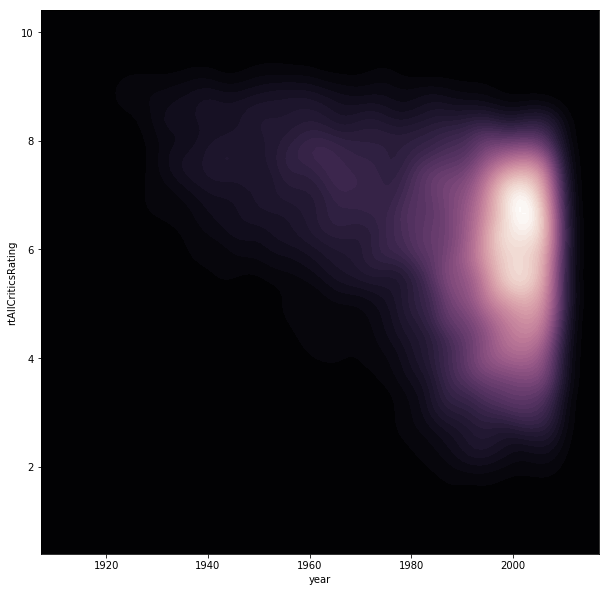

In [10]:
# 
# Optional Activity 
#
# Above plot doesn't really provide good insight into what is going on. 
# I believe a seaborn kernel density plot was a much better way to show this. 
# It is not asked, but is an optional activity. 
# 
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(movies.year, movies.rtAllCriticsRating, cmap=cmap, n_levels=60, shade=True);

*Charu's observations here*              
As can be seen from the line and scatter plot, following observations are made -       
1. The number of movies and reviewes has shown an increasing trend as years have passed.         
2. With every passing year, the average critic rating of movies has decreased. Though the decrease is not a continuous pattern. There are some spikes indicating increase in average rating. But overall, the average rating has come down from about 8 in 1910's to about 5.5 in 2000's.         
3. As a potential explanation for drop in ratings - it could be possible that new concepts in old times were received with higher interest level. As time passed, the similar movie themes continued and public interest decreased. The decreased interest can be attributed to drop in ratings.         

---

## Part 2: Naive Bayes

Now it gets fun!  You are going to use a [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. Review the assigned readings on Canvas, as well as the relevant lecture notes before embarking on this journey.

### Using CountVectorizer

One thing that may help you in the following problems is the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in a blurb.  Here's a simple example, make sure you understand what's going on!

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['machine learning rocks', 'machine learning rules', 'rocks rocks rules']
print('Original text is\n', '\n'.join(text))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print
print('Transformed text vector is \n', x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print('Words for each feature:')
print(vectorizer.get_feature_names())

Original text is
 machine learning rocks
machine learning rules
rocks rocks rules
Transformed text vector is 
 [[1 1 1 0]
 [1 1 0 1]
 [0 0 2 1]]
Words for each feature:
['learning', 'machine', 'rocks', 'rules']


### 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row corresponds to a bag-of-words representation for a single review. This will be the *input* to your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* from your model.
 
Make sure to remove items with no review text

In [12]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
#
# Data cleansing
#
#
reviews = reviews[~reviews.quote.isnull()]
reviews = reviews[reviews.quote.str.len() > 0]
reviews = reviews[~reviews.fresh.isnull()]
reviews = reviews[reviews.fresh.str.len() > 0]
reviews['fresh'] = reviews['fresh'].replace({'fresh': 1, 'rotten': 0})
reviews = pd.get_dummies(reviews, columns=['fresh'])
#
# Define function
#
def make_xy(reviews):
    #Charu's code begins here
    vectorizer = CountVectorizer(min_df=0)
    vectorizer.fit(reviews.quote)
    X = vectorizer.transform(reviews.quote)
    X = X.toarray()
    Y = reviews.fresh_1.values
    return X, Y

In [13]:
X, Y = make_xy(reviews)
print(X.shape)
print(Y.shape)
type(Y)

(12718, 20267)
(12718,)


numpy.ndarray

### 2.2 Test-Train split

Next, randomly split the data into two groups: a training set and a validation set.  You can do this manually, as you did in the prior problem set.  Or, use [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to do this auto-magically.  See [this guide](http://scikit-learn.org/stable/modules/cross_validation.html) for a simple example of how `train_test_split` works.

In [14]:
#
# Charu's code begins here
# 
# Now we create test data and training data
# Training data size = 70% 
# 
x_train , x_test = train_test_split(reviews,test_size=0.3) 
#
# Analyze how many fresh and rotten values exist in training and testing data
#
print('Training Data Counts: \n', x_train['fresh_1'].value_counts())
print('Test Data Counts: \n', x_test['fresh_1'].value_counts())

Training Data Counts: 
 1    5517
0    3385
Name: fresh_1, dtype: int64
Test Data Counts: 
 1    2432
0    1384
Name: fresh_1, dtype: int64


### 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
 object.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



OPTION 1 - Accuracy using training model on training data is:  0.930015726803
Confusion matrix for Option 1 on train data: 
 [[2972  413]
 [ 210 5307]]


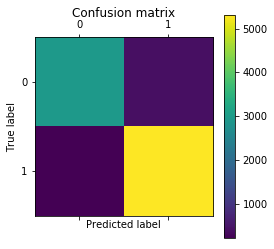

OPTION 1 - Accuracy using test model on test data is:  0.957023060797
Confusion matrix for Option 1 on test data: 
 [[1256  128]
 [  36 2396]]


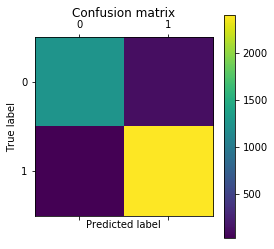

In [15]:
#
# Charu's code begins here
#
#           OPTION 1 - AS SPECIFIED IN ASSIGNMENT, DIDN'T WORK ENTIRELY RIGHT FOR ME
# 
# I ran into some issues with performing this as specified. I tried to train the model on training data, and 
# predict using both training and test data. But for test data prediction, I kept running into issue called 
# 'Value not aligned, dimension error'. I spent 6+ hours on making it work, but could not. 
# The only way I could make this work is train two separate models for train and test data. 
# And then predict train data using train model and test data using test model. 
# That is not the correct way to do it, but that was the only way to get rid of the 'value not aligned' error. 
# I suspect there are some values in test data that are not there in train data. So that is why it was 
# having that error. I did find another option to make it work. 
#
# call the fitted model fitted_model, for future reference:
#
#
# Accuracy using training data 
#
X_train, Y_train = make_xy(x_train)
fitted_model_train = MultinomialNB().fit(X_train, Y_train)
predictions_train = fitted_model_train.predict(X_train)
confusion = confusion_matrix(Y_train, predictions_train)
accuracy = accuracy_score(Y_train, predictions_train)
print('OPTION 1 - Accuracy using training model on training data is: ', accuracy)
#
# Plot Confusion Matrix train data - Option 1. 
#
print('Confusion matrix for Option 1 on train data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#
# Accuracy using test data 
# This is where I was running into 'value not aligned error' with trained model.
# So I trained another model using test data and used it for prediction. 
# This is obviously not entirely correct. But read option 2. That is much more
# convincing. 
#
X_test, Y_test = make_xy(x_test)
fitted_model_test = MultinomialNB().fit(X_test, Y_test)
predictions_test = fitted_model_test.predict(X_test)
confusion = confusion_matrix(Y_test, predictions_test)
accuracy = accuracy_score(Y_test, predictions_test)
print('OPTION 1 - Accuracy using test model on test data is: ', accuracy)
#
# Plot Confusion Matrix test data - Option 1. 
#
print('Confusion matrix for Option 1 on test data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

OPTION 2 - Accuracy using trained model on test data is:  0.781970649895
Confusion matrix for Option 2 on test data: 
 [[ 835  549]
 [ 283 2149]]


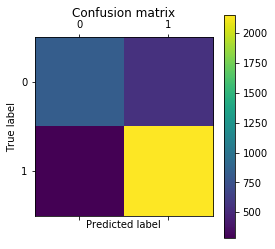

OPTION 2 - Accuracy using trained model on training data is:  0.930015726803
Confusion matrix for Option 2 on train data: 
 [[2972  413]
 [ 210 5307]]


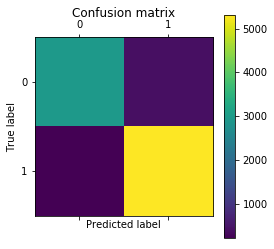

In [16]:
#
#           OPTION 2 - USE Pipeline FUNCTION WITH CountVectorizer AND MultinomialNB
# 
# I ran into some issues with performing this as specified as mentioned above. 
# I was able to overcome this by using Pipeline function. This basically does the same thing as option 1. 
# But the way of execution is slightly different. But this gives same results and gets the job done.  
#
# Using Pipeline, combine outputs from CountVectorizer and MultinomialNB.  
#
fitted_model = Pipeline([
    ('vectorizer',  CountVectorizer(min_df=0)),
    ('classifier',  MultinomialNB())])
#
# Train the model on training data. Just pass plain text values. 
#
X_train2 = x_train.quote.values
Y_train2 = x_train.fresh_1.values
fitted_model.fit(X_train2, Y_train2) 
#
# Predict the test data using trained model. Just pass plain text values.  
#
X_test2 = x_test.quote.values
Y_test2 = x_test.fresh_1.values
predictions_option2_test = fitted_model.predict(X_test2)
confusion = confusion_matrix(Y_test2, predictions_option2_test)
old_accuracy = accuracy_score(Y_test2, predictions_option2_test)
print('OPTION 2 - Accuracy using trained model on test data is: ', old_accuracy)
#
# Plot Confusion Matrix test data - Option 2. 
#
print('Confusion matrix for Option 2 on test data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
#
# Predict the training data using trained model
# This is odd, since we are predicting on same data used for training
#
predictions_option2_train = fitted_model.predict(X_train2)
confusion = confusion_matrix(Y_train2, predictions_option2_train)
old_accuracy_train = accuracy_score(Y_train2, predictions_option2_train)
print('OPTION 2 - Accuracy using trained model on training data is: ', old_accuracy_train)
#
# Plot Confusion Matrix train data - Option 2. 
#
print('Confusion matrix for Option 2 on train data: \n', confusion)
plt.matshow(confusion)
plt.title('Confusion matrix', y=1.08)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Charu's observations here**         
      
**Option 1 - Train two separate models and predict the data used for training**     
       
This isn't really optimal option. But since the data used to train the model is used for prediction, we can see >90% accuracy for both training and testing dataset. The accuracy is better for test model, probably because of smaller volume of data.      
       
**Option 2 - Use pipeline function and do the things the way should be done.**     
       
Accuracy on training data remains unchanged from option 1. This is a solid proof that option 2 provides same results. Option 2 also works on test data using the trained model, and does the things the way they should be done.  
     
The accuracy on test data is more than 75%, which indicates that though this is decent model, it needs to include more than just text. Sometimes people use sarcasm in reviewes and that can throw the model off. Using more categorical predictors should help the model give more accurate results.          
        

### 2.4 (EXTRA CREDIT) Naive Bayes from Scratch!
That was almost too easy, right?  Right.

Your next mission, should you choose to accept it, is to write your own Naive Bayes classifier without relying on `MultinomialNB` or a similar pre-written package.  In addition to the lecture notes and assigned readings, I highly recommend that you review Michael Collin’s lecture notes on Naïve Bayes before starting (available on Canvas).  

**Note:**
You should do this extra credit assignment *after* you have finished the rest of the problem set.  It is very rewarding, but can also be quite time-consuming!

*Hint: You will benefit most from this exercise if you attempt to write the algorithm directly from the lecture notes.  That said, if you really get stuck, Krishnamurthy Viswanathan has written a simple version of [NB in python](http://ebiquity.umbc.edu/blogger/2010/12/07/naive-bayes-classifier-in-50-lines/), which you can peek at if you really get stuck.*

In [17]:
#
# Charu's code here - 
#
# Note - Inspired from this below link - 
# http://ebiquity.umbc.edu/blogger/2010/12/07/naive-bayes-classifier-in-50-lines/
# 
# This will define our code naive bayes function from scratch 
# 
class naive_bayes_charu(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]

    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)

In [18]:
# 
# For this we will use the training dataset
# 
X_train2 = x_train.quote.values
Y_train2 = x_train.fresh_1.values
#
# Define vectorizer
#
vectorizer = CountVectorizer()
vectorizer.fit(X_train2)
x_train_vector = vectorizer.transform(X_train2)
x_train_vector = x_train_vector.toarray()
#
# fit the model using training data
#
nb = naive_bayes_charu().fit(x_train_vector, Y_train2)


In [19]:
#
# predict the model using test data - DOES NOT WORK
# The problem with this model is that it needs the input data to be of
# same dimensions as training data. Since training data is of different dimensions that test
# set, this statement fails. This cannot predict test data. 
#
X_test2 = x_test.quote.values
Y_test2 = x_test.fresh_1.values
vectorizer.fit(X_test2)
x_test_vector = vectorizer.transform(X_test2)
x_test_vector = x_test_vector.toarray()
# predictions_test = nb.predict(x_test_vector) <-- Failed statement. 


In [20]:
#
# But we can certainly predict our training data, which is not ideal. 
# But that is still something out of this model made from scratch. 
#
predictions_train = nb.predict(x_train_vector)
#
# Find accuracy and print confusion matrix
#
confusion = confusion_matrix(Y_train2, predictions_train)
accuracy = accuracy_score(Y_train2, predictions_train)
print('Accuracy using naive bayes from scratch: ', accuracy)
print('Confusion matrix using naive bayes from scratch: \n', confusion)

Accuracy using naive bayes from scratch:  0.930015726803
Confusion matrix using naive bayes from scratch: 
 [[2972  413]
 [ 210 5307]]


** Charu's observations on naive bayes model made from scratch **        
          
As mentioned above, this model  needs all input data to be of same dimensions as training data. That is not the case here, and the model cannot predict test data (which is kind of disappointing really, I had not thought of that).     
      
But we did predict our training data and in the observed instance, the accuracy is about 92%. So this is a somewhat functional model. It is not generalizable and needs to be customized for each set of data in order to correctly predict test data.    
        

---

## Part 3: Evaluation

### 3.1 Estimate the likelihood of your data

Given a fitted model, you can compute the log-likelihood of your data as a way to assess the performance of your model.  Using `fitted_model.predict_logproba`, the idea is to write a function that computes the log-likelihood of a dataset, so that we can inspect the log-likelihood of your training and testing data given your fitted model from part 2.

To help you out a little bit, we'll do this part for you. But make sure you understand it, because you'll need to use this later!

In [21]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()
#
# output the likelihood of your test data (example - you may need to 
# change the names of the variables below to match your code in 2.2 and 2.3
#
log_likelihood(fitted_model, X_test2, Y_test2)

-2147.4258844012406

### 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

How are we are going to use cross-validation to tune these hyperparameters?  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.cross_validation.cross_val_score`, that might save you a lot of time here...*

In [22]:
#
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
L = None
max_loglike = -np.inf
np.warnings.filterwarnings('ignore')
cross_validated_data = []
#
# Find the best value for alpha and min_df, and the best classifier
# Below code loads an array with values of accuracy, log-likelihood, alpha and min_df
# We will use a combination of cross_val_predict and cross_val_score.  
# cross_val_predict will use cross validation to predict log likelihood
# cross_val_score will use cross validation to predict accuracy. This is only for reference
# We are not actually using this accuracy number. We are only using log likelihood derived from
# cross_val_predict. But accuracy number will be used in extra credit question 3.4. 
# 
for alpha in alphas:
    for min_df in min_dfs:    
        #Charu's code begins here
        fitted_model = Pipeline([
        ('vectorizer',  CountVectorizer(min_df = min_df)),
        ('classifier',  MultinomialNB(alpha=alpha))])
        def log_likelihood(model, x, y):
            model.fit(x, y) 
            prob = cross_val_predict(fitted_model, x, y, cv=10, method='predict_log_proba')
            rotten = y == 0
            fresh = ~rotten
            return prob[rotten, 0].sum() + prob[fresh, 1].sum()
        L = log_likelihood(fitted_model, X_test2, Y_test2)
        scores = cross_val_score(fitted_model, X_test2, Y_test2, cv=10)    
        print('Accuracy: ', scores.mean(), 'Alpha: ', alpha, 'min_df: ', min_df, 'loglike: ', L)
        cross_validated_data.append({'accuracy': scores.mean(), 'alpha': alpha, 
                                     'min_df': min_df, 'loglike': L})  

Accuracy:  0.701264098153 Alpha:  0 min_df:  1e-05 loglike:  -30197.1963602
Accuracy:  0.701264098153 Alpha:  0 min_df:  0.0001 loglike:  -30197.1963602
Accuracy:  0.711747716548 Alpha:  0 min_df:  0.001 loglike:  -9422.63505941
Accuracy:  0.663514764098 Alpha:  0 min_df:  0.01 loglike:  -2386.71578843
Accuracy:  0.632868545065 Alpha:  0 min_df:  0.1 loglike:  -2458.30751244
Accuracy:  0.724596921284 Alpha:  0.1 min_df:  1e-05 loglike:  -3830.21151749
Accuracy:  0.724596921284 Alpha:  0.1 min_df:  0.0001 loglike:  -3830.21151749
Accuracy:  0.716987462691 Alpha:  0.1 min_df:  0.001 loglike:  -2853.75671804
Accuracy:  0.663775860704 Alpha:  0.1 min_df:  0.01 loglike:  -2385.80402205
Accuracy:  0.632868545065 Alpha:  0.1 min_df:  0.1 loglike:  -2458.3025138
Accuracy:  0.730102548525 Alpha:  1 min_df:  1e-05 loglike:  -2664.96372934
Accuracy:  0.730102548525 Alpha:  1 min_df:  0.0001 loglike:  -2664.96372934
Accuracy:  0.725374066786 Alpha:  1 min_df:  0.001 loglike:  -2344.5842105
Accurac

In [23]:
#
# Below code converts loaded array into dataframe, and moves 
# appropriate values into 'best' parameter fields. 
# 
cross_validated_data = pd.DataFrame(cross_validated_data)
cross_validated_data = cross_validated_data.sort_values(['loglike'], ascending=False)
print(cross_validated_data.head(1))
best_alpha = cross_validated_data.iloc[0]['alpha']
best_min_df = cross_validated_data.iloc[0]['min_df']
max_loglike = cross_validated_data.iloc[0]['loglike']
print('Value of best alpha is: ', best_alpha)
print('Value of best min_df is: ', best_min_df)
print('Value of maximum log likelihood is: ', max_loglike)


    accuracy  alpha      loglike  min_df
12  0.725374    1.0 -2344.584211   0.001
Value of best alpha is:  1.0
Value of best min_df is:  0.001
Value of maximum log likelihood is:  -2344.5842105


### 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

In [24]:
#
# Below code will retrain the model based on best parameter
# values derived above. 
#
# Using Pipeline, combine outputs from CountVectorizer and MultinomialNB.  
#
fitted_model = Pipeline([
    ('vectorizer',  CountVectorizer(min_df=best_min_df)),
    ('classifier',  MultinomialNB(alpha=best_alpha))])
#
# Train and predict model with cross validation
#
fitted_model.fit(X_train2, Y_train2) 
#
# Predict using test data
#
predictions_new_test = fitted_model.predict(X_test2)
new_accuracy = accuracy_score(Y_test2, predictions_new_test)
print('New accuracy using trained model on test data is: ', new_accuracy)
print('Old Accuracy using old model without cross validation on test data is: ', old_accuracy)
#
# Predict using training data
#
predictions_new_train = fitted_model.predict(X_train2)
new_accuracy_train = accuracy_score(Y_train2, predictions_new_train)
print('New accuracy using trained model on training data is: ', new_accuracy_train)
print('Old Accuracy using old model without cross validation on training data is: ', old_accuracy_train)

New accuracy using trained model on test data is:  0.744234800839
Old Accuracy using old model without cross validation on test data is:  0.781970649895
New accuracy using trained model on training data is:  0.815547068075
Old Accuracy using old model without cross validation on training data is:  0.930015726803


**Charu's observations here**     

We can see two accuracies.       
1. New accuracy using best parameters derived with cross validation          
2. Old accuracy without any cross validation and with default parameters        
         
**Observation about accuracy - **        
         
To my surprise the the model with best parameters is less accurate than old model without any cross validation and with old parameters. I would have expected the new model to be more accurate since we used cross validation techniques.      
              
**Overfitting - **    
     
One of the strong indicators of overfitting is if the model performs much better on training dataset than test dataset. Looking at values for original model, accuracy on test data was about 75%, and accuracy on training data was about 93%.       
       
(Note - these figures will change as script is rerun.)   
     
There is strong evidence of overfitting in the old model without cross validation. However with new model, the accuracy on test data and training data (see printed values above), both are very comparable. In the observed instance, both are about 73% (again these will change as model is rerun but you get the idea.)           
   
With new model, we can confidently say that we have reduced overfitting considerably. However, our accuracy came down by about 3% in the observed instance.       
      
**Effects of cross validation - **    
       
1. Already covered above, but providing a summary. Cross validation reduces the overfitting as can be seen from new accuracies, that are very similar for training and test data.    
   
2. Slightly reduced accuracy for test data.      
   
3. Reduced bias, efective sampling and training. The model can be improved a lot by including additional predictors than just text of the review. But that is discussion for another day.            
         


### 3.4 (Extra Credit)

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [25]:
#
# I will consider classification accuracy.         
# We will print the results sorted by accuracy
#
cross_validated_data = cross_validated_data.sort_values(['accuracy'], ascending=False)
print('Log Likelihood data sorted by accuracy: \n', cross_validated_data)
#
# Retrain the model using parameters with highest accuracy. 
# See what happens. 
#
best_accuracy_alpha = cross_validated_data.iloc[0]['alpha']
best_accuracy_min_df = cross_validated_data.iloc[0]['min_df']
max_accuracy_loglike = cross_validated_data.iloc[0]['loglike']
print('Value of alpha at best accuracy is: ', best_accuracy_alpha)
print('Value of min_df at best accuracy is: ', best_accuracy_min_df)
print('Value of log likelihood at best accuracy is: ', max_accuracy_loglike)
#
# Below code will retrain the model based on best parameter
# values derived above. 
#
# Using Pipeline, combine outputs from CountVectorizer and MultinomialNB.  
#
fitted_model = Pipeline([
    ('vectorizer',  CountVectorizer(min_df=best_accuracy_min_df)),
    ('classifier',  MultinomialNB(alpha=best_accuracy_alpha))])
#
# Train and predict model with cross validation
#
fitted_model.fit(X_train2, Y_train2) 
#
# Predict using test data
#
predictions_new_test = fitted_model.predict(X_test2)
new_accuracy = accuracy_score(Y_test2, predictions_new_test)
print('Accuracy model - New accuracy using trained model on test data is: ', new_accuracy)
print('Old Accuracy using old model without cross validation on test data is: ', old_accuracy)
#
# Predict using training data
#
predictions_new_train = fitted_model.predict(X_train2)
new_accuracy_train = accuracy_score(Y_train2, predictions_new_train)
print('Accuracy model - New accuracy using trained model on training data is: ', new_accuracy_train)
print('Old Accuracy using old model without cross validation on training data is: ', old_accuracy_train)

Log Likelihood data sorted by accuracy: 
     accuracy  alpha       loglike   min_df
10  0.730103    1.0  -2664.963729  0.00001
11  0.730103    1.0  -2664.963729  0.00010
12  0.725374    1.0  -2344.584211  0.00100
5   0.724597    0.1  -3830.211517  0.00001
6   0.724597    0.1  -3830.211517  0.00010
7   0.716987    0.1  -2853.756718  0.00100
17  0.713061    5.0  -2357.089532  0.00100
2   0.711748    0.0  -9422.635059  0.00100
1   0.701264    0.0 -30197.196360  0.00010
0   0.701264    0.0 -30197.196360  0.00001
22  0.672173   10.0  -2912.516384  0.00100
18  0.670339    5.0  -2361.973407  0.01000
23  0.669813   10.0  -2359.661120  0.01000
13  0.665345    1.0  -2378.672965  0.01000
8   0.663776    0.1  -2385.804022  0.01000
3   0.663515    0.0  -2386.715788  0.01000
28  0.662985   50.0  -2576.685513  0.01000
16  0.653303    5.0  -4618.459326  0.00010
15  0.653303    5.0  -4618.459326  0.00001
21  0.640988   10.0  -5672.897172  0.00010
20  0.640988   10.0  -5672.897172  0.00001
27  0.638105

** Charu's observations - **         
         
I will consider classification accuracy.         
           
I trained a new model with parameters corresponding to best accuracy. Results are printed above. The results with this model, based on accuracy, are the exact same as our original model, at least in the observed instance.        
     
** Interpretation **         
        
From accuracy and log likelihood values printed above, we can see that model with highest accuracy is not necessarily the one with maximum log likelihood. For the observed instance, the model with maximum log likelihood had an accuracy of about 70%, while the most accurate model was at more than 73% but with a lower log likelihood.        
        
In my view, accuracy is not a good parameter to consider in this situation. As we saw, this model is prone to overfitting and solely going by accuracy results in exact same results as original model, which was clearly overfitting.         
       
** Conclusion **         
        
I would stick to using maximum likelihood. It significantly reduces overfitting. The accuracy with that model does reduce by a smaller percentage, but I am willing to make that compromise in exchange of reduced overfitting.      
      

### 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [26]:
#
# For this we will use the entire dataset, not just training set
# 
X = reviews.quote.values
Y = reviews.fresh_1.values
#
# Define vectorizer and classifier functions with best parameter values
#
vectorizer = CountVectorizer(min_df=best_min_df)
vectorizer.fit(X)
x = vectorizer.transform(X)
#
classifier = MultinomialNB(alpha=best_alpha)
classifier.fit(x, Y)
#
# Define a function. Here are the steps - 
# Extract class_labels. They will be '0' for rotten and '1' for freh. 
# Extract feature names
# Extract classifier.coef. They are weights associated with fitted words (actually words corresponding to vectorized text)
# Sort it by coefficient value. You get top 10 words for each class label (0 and 1)
#
def most_informative_feature_for_fresh_rotten(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
#
    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)
#
    print()
#
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)
#
most_informative_feature_for_fresh_rotten(vectorizer, classifier)

0 -11.7674126326 disappointingly
0 -11.7674126326 lame
0 -11.7674126326 pointless
0 -11.7674126326 sadly
0 -11.7674126326 tiresome
0 -11.7674126326 uninspired
0 -11.074265452 disappointment
0 -11.074265452 misguided
0 -11.074265452 muddled
0 -11.074265452 plodding

1 -2.6680038213 the
1 -3.10785219986 and
1 -3.12499747639 of
1 -3.67456160503 is
1 -3.75771727482 to
1 -3.79356825662 it
1 -4.02154440277 in
1 -4.16202026775 that
1 -4.40286561831 as
1 -4.44424191462 with


**Charu's observations here - PART 1**

We can see two sets of 10 words each.       
1. '0' corresponds to rotten review. We can see a nice list of words which accurately reflect rotten rating.     
2. '1' corresponds to fresh review. Here we can see many words are stop words - like in, if, that, as etc. We can do some stop word processing on that. 

In [27]:
#
# EXclude stop words and do the same thing again. 
# This time, collect the words in most_informative_words array. 
# Define vectorizer and classifier functions with best parameter values
#
vectorizer = CountVectorizer(min_df=best_min_df, stop_words='english')
vectorizer.fit(X)
x = vectorizer.transform(X)
#
classifier = MultinomialNB(alpha=best_alpha)
classifier.fit(x, Y)
most_informative_words = []
#
# Define a function. Here are the steps - 
# Extract class_labels. They will be '0' for rotten and '1' for freh. 
# Extract feature names
# Extract classifier.coef. They are weights associated with fitted words (actually words corresponding to vectorized text)
# Sort it by coefficient value. You get top 10 words for each class label (0 and 1)
#
def most_informative_feature_for_fresh_rotten(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
#
    for coef, feat in topn_class1:
        print(class_labels[0], coef, math.exp(coef), feat)
        most_informative_words.append({'label': class_labels[0], 'text': feat})  
#
    print()
#
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, math.exp(coef), feat)
        most_informative_words.append({'label': class_labels[1], 'text': feat})  
#
most_informative_feature_for_fresh_rotten(vectorizer, classifier)

0 -10.946393314 1.7621455884685206e-05 disappointingly
0 -10.946393314 1.7621455884685206e-05 lame
0 -10.946393314 1.7621455884685206e-05 pointless
0 -10.946393314 1.7621455884685206e-05 sadly
0 -10.946393314 1.7621455884685206e-05 tiresome
0 -10.946393314 1.7621455884685206e-05 uninspired
0 -10.2532461335 3.524291176937042e-05 disappointment
0 -10.2532461335 3.524291176937042e-05 misguided
0 -10.2532461335 3.524291176937042e-05 muddled
0 -10.2532461335 3.524291176937042e-05 plodding

1 -3.74298779296 0.02368323670901692 film
1 -3.9226343593 0.01978889495850148 movie
1 -4.98281397042 0.006854746339142543 good
1 -5.01946728807 0.006608045956756951 best
1 -5.0248148944 0.006572803044987585 like
1 -5.03831037587 0.0064846957655641585 story
1 -5.15949593268 0.005744594618407378 time
1 -5.2628135467 0.00518070803009745 comedy
1 -5.35914465564 0.004704928721210951 director
1 -5.36289700526 0.004687307265326265 movies


**Charu's observations here - PART 2**     

Now fresh list looks much better with stop words excluded. It is still not very convincing, but we will stop here for the purpose of this assignment. Any fine tuning beyond this will require advanced text processing and a lot of time. 

**Charu's observations here - PART 3**     
**Q - For each word, what is the model's probability of freshness if the word appears one time? **      
**A** - I tried to provide an exact answer and spent about 2 hours. It didn't work. But I thought of explaining how I believe it could be done. Above, I print exponent of classifier coefficients, which correponds to the probability of a feature given the positive class. Means given a fresh review, what is the probability of finding that feature (word) in the review. And we can see the probabilities printed. That is not exactly what is asked, but I did make an effort to provide some info on probability.     
      
I believe it has something to do with zeroing out all other words except that word, so all weight is given to that word. I also suspect it has something to do with identity matrix. But I could not write the exact code that would get it done, and I simply ran out of time.           

### 3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [28]:
#
# Charu's code here
# 
fitted_model = Pipeline([
    ('vectorizer',  CountVectorizer(min_df=best_min_df)),
    ('classifier',  MultinomialNB(alpha=best_alpha))])
#
# Train new model with all data
#
fitted_model.fit(X, Y) 
#
# Predict using all data
#
predictions_all = fitted_model.predict(X)
confusion = confusion_matrix(Y, predictions_all)
accuracy = accuracy_score(Y, predictions_all)
print('Accuracy using model on all data is: ', accuracy)


Accuracy using model on all data is:  0.797845573203


In [29]:
#
# Charu's code here - continued
# Predict probabilities, load predicted and actual ratings in a dataframe
# Sort dataframe with ascending and descending on these two columns, and then
# sort on probability of fresh.
# You get worst performing reviews. 
# 
probabilities = fitted_model.predict_proba(X)
probabilities = pd.DataFrame(probabilities, columns = ["prob_rotten", "prob_fresh"])
results_df = pd.DataFrame({'quote':X, 'original_rating':Y, 'predicted_rating':predictions_all,
                           'prob_rotten': probabilities.prob_rotten, 'prob_fresh': probabilities.prob_fresh})
results_df_fresh_bad = results_df.sort_values(['original_rating', 'predicted_rating', 'prob_fresh'], 
                                    ascending=[False, True, True]) 
results_df_rotten_bad = results_df.sort_values(['original_rating', 'predicted_rating', 'prob_fresh'], 
                                    ascending=[True, False, False]) 
pd.options.display.max_colwidth = 50
print(results_df_fresh_bad.head(5))
print(results_df_rotten_bad.head(5))
pd.options.display.max_colwidth = 1000
print()
print('Fresh reviews with poor performance: \n')
print(results_df_fresh_bad.quote.head(5))
print()
print('Rotten reviews with poor performance: \n')
print(results_df_rotten_bad.quote.head(5))

       original_rating  predicted_rating  prob_fresh  prob_rotten  \
5125                 1                 0    0.000278     0.999722   
2054                 1                 0    0.001146     0.998854   
8154                 1                 0    0.001872     0.998128   
10742                1                 0    0.002296     0.997704   
1647                 1                 0    0.002938     0.997062   

                                                   quote  
5125   Some of the gags don't work, but fewer than in...  
2054   Though it's a good half hour too long, this ov...  
8154   There's too much talent and too strong a story...  
10742  A kind of insane logic seems to connect the sk...  
1647   The gangland plot is flimsy (bad guy Peter Gre...  
       original_rating  predicted_rating  prob_fresh  prob_rotten  \
11835                0                 1    0.998636     0.001364   
8959                 0                 1    0.998094     0.001906   
5968                 0  

In [30]:
#
# Find freshness probability of the given text review. 
#
T = ['This movie is not remarkable, touching, or superb in any way']
fitted_model.predict_proba(T)

array([[ 0.00148854,  0.99851146]])

** Charu's observations here **        
    
Freshness probability of review "This movie is not remarkable, touching, or superb in any way" -      
printed above. In observed instance, it was about 98.5%. The model is completely fooled here. It is not recognizing the negative sense in the review, and is treating this as positive review.      
        
** Q - Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.**      
     
Answer - Printed above.      
         
** Q - What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? **         
         
Answer - The answer is evident above where it was fooled by the negative review. The assumption of indepence fails in such situation, where 'not', 'neither' or negative verbs like that reverse the meaning of positive words used. Ideally, the model should look out for such words and treat them as dependent.           
     
Fresh reviews with poor performance: -     
      
In this case, reviews are really saying that this movie is not as bad as they expected, or they have seen worse from same actors. This is actually a positive review. But since naive bayes assumes independence, it thinks it is a negative review. 
     
Rotten reviews with poor performance: -     
      
These are almost same as the example review specified in the question. The reviews are negative in nature such as 'not good', 'not a masterpiece' but naive bayes assumes independence and treats these as fresh reviews.          
 

## Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [31]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
bdata = load_boston()

### 4.1 Remember the last problem set?

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

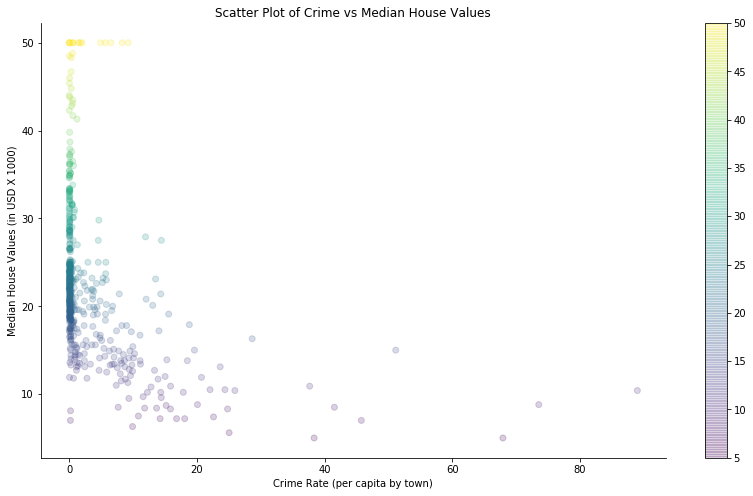

In [32]:
#
# Charu's code here
# 
boston = pd.DataFrame(bdata.data, columns= bdata['feature_names'])
boston['target'] = pd.Series(bdata.target)
#
# Create a scatter plot, remove top and right axes
# use correct labels. 
#
fig, ax1 = plt.subplots()
fig.set_size_inches(14, 8)
plt.title("Scatter Plot of Crime vs Median House Values")
plt.xlabel("Crime Rate (per capita by town)")
plt.ylabel("Median House Values (in USD X 1000)")
plt.scatter(boston.CRIM, boston.target, alpha=0.2, c=boston.target)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.colorbar()
plt.show()

In [33]:
#
# Regress median housing price on average number of rooms per house
# 
# Now we create test data and training data
# Training data size = 66% 
# 
x_train , x_test = train_test_split(boston,test_size=0.34) 
regression = LinearRegression()
regression.fit(x_train.RM.reshape(-1,1), x_train.target)
#
# Predict using test data and train data
#
predictions_test = regression.predict(x_test.RM.reshape(-1,1))
predictions_train = regression.predict(x_train.RM.reshape(-1,1))
#
# Calculate RMSE on test and training data
#
print('RMSE on test data: ', sqrt(mean_squared_error(x_test.target, predictions_test)))
print('RMSE on training data: ', sqrt(mean_squared_error(x_train.target, predictions_train)))

RMSE on test data:  7.2892725028331755
RMSE on training data:  6.244561613064413


### 4.2 So many scatterplots!

Choose 8 out of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

In [34]:
boston.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


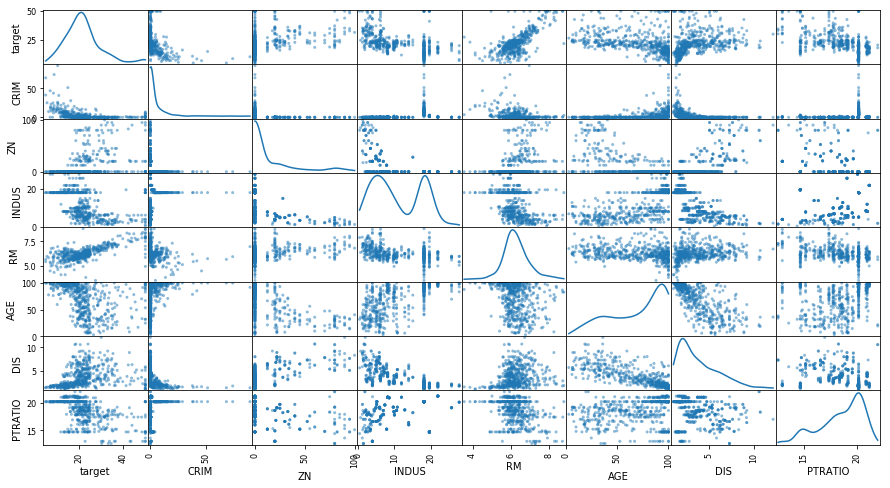

In [35]:
#
# We will choose following 8 feratures
# target, CRIM, ZN, INDUS, RM, AGE, DIS, PTRATIO
#
# I could not get below specified code to work. 
# I will use an alternate method. #
#
#plt.figure(figsize=(12,12))
#for i in xrange(8):
#    for j in xrange(8):
#        plt.subplot(8, 8, i * 8 + j + 1)
        # insert your code here
#
from pandas.plotting import scatter_matrix
plot_data = boston[['target', 'CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO']]
scatter_matrix(plot_data,figsize=(15, 8), diagonal='kde')
plt.show()

### 4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

Explained Variance values are: 
 [  7.96460509e-01   1.72524310e-01   2.00607564e-02   7.13617600e-03
   1.56145920e-03   1.21775420e-03   4.04383601e-04   3.17566042e-04
   2.19637788e-04   6.49568389e-05   2.60965545e-05   5.09886955e-06
   1.22056591e-06]


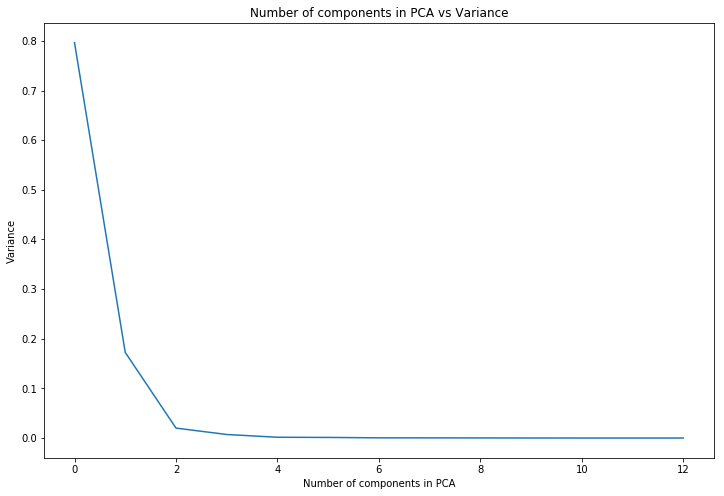

In [36]:
# 
# Charu's code here
# 
PCA_df = x_train
PCA_function = PCA(n_components=13)
PCA_function.fit(PCA_df)
explained_variance = PCA_function.explained_variance_ratio_
print('Explained Variance values are: \n', explained_variance)
plt.figure(figsize=(12,8))
plt.title("Number of components in PCA vs Variance")
plt.xlabel("Number of components in PCA")
plt.ylabel("Variance")
plt.plot(explained_variance)
plt.show()

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

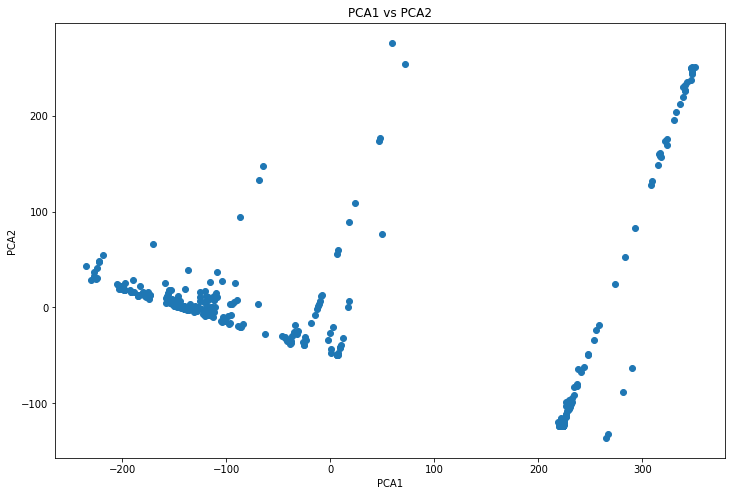

In [37]:
# 
# Charu's code here
#
# First I will create individual plots for understanding. At the end of this question I will
# convert them to 1 X 3 grid. 
# 
# Q 4.4.1 - PCA 1 vs. PCA 2 
# 
PCA1 = PCA(n_components=2)
PCA1.fit(PCA_df)
fitted_PCA1=PCA1.fit_transform(PCA_df)
plt.figure(figsize=(12,8))
plt.title("PCA1 vs PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.scatter(fitted_PCA1[:,0],fitted_PCA1[:,1])
plt.show()

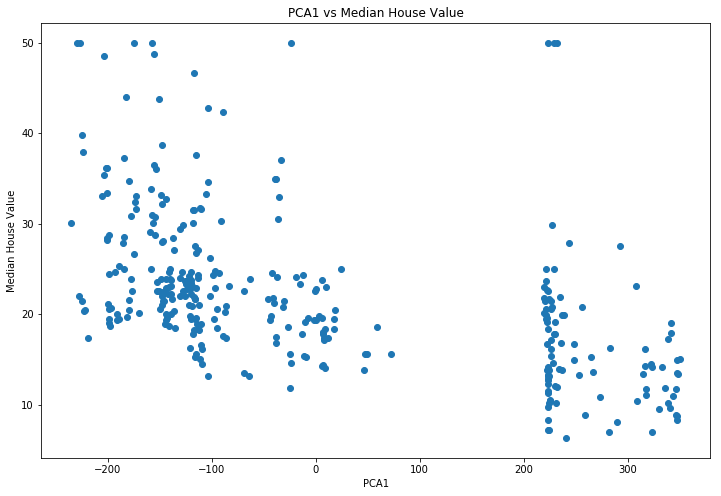

In [38]:
# 
# Q 4.4.2 - PCA 1 vs. Median House Value
# 
plt.figure(figsize=(12,8))
plt.title("PCA1 vs Median House Value")
plt.xlabel("PCA1")
plt.ylabel("Median House Value")
plt.scatter(fitted_PCA1[:,0],PCA_df.target)
plt.show()

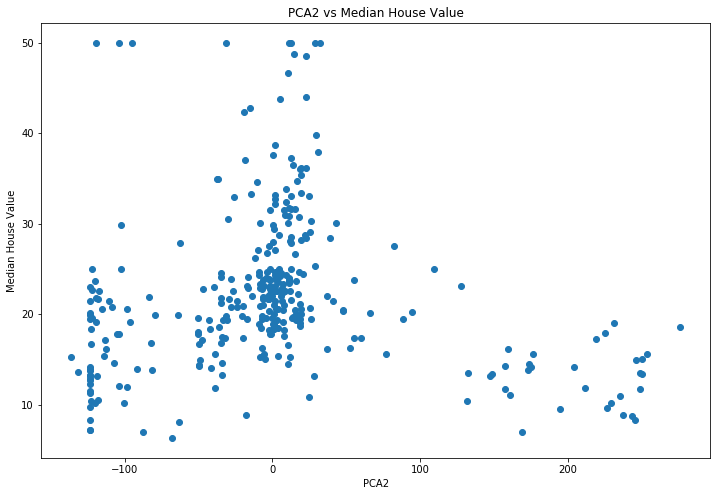

In [39]:
# 
# Q 4.4.3 - PCA 2 vs. Median House Value
# 
plt.figure(figsize=(12,8))
plt.title("PCA2 vs Median House Value")
plt.xlabel("PCA2")
plt.ylabel("Median House Value")
plt.scatter(fitted_PCA1[:,1],PCA_df.target)
plt.show()

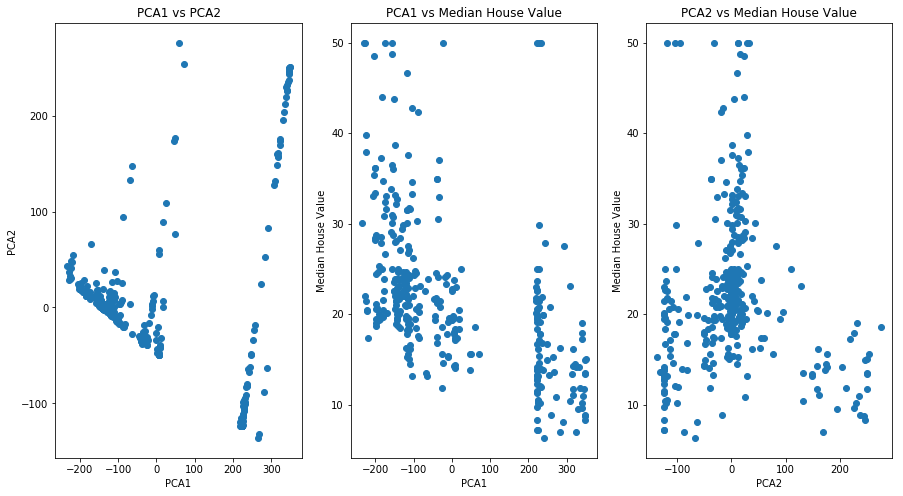

In [40]:
# 
# Finally, create a 1 X 3 grid plot
# 
plt.figure(figsize=(15,8))
#
plt.subplot(131)
plt.title("PCA1 vs PCA2")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.scatter(fitted_PCA1[:,0],fitted_PCA1[:,1])
#
plt.subplot(132)
plt.title("PCA1 vs Median House Value")
plt.xlabel("PCA1")
plt.ylabel("Median House Value")
plt.scatter(fitted_PCA1[:,0],PCA_df.target)
#
plt.subplot(133)
plt.title("PCA2 vs Median House Value")
plt.xlabel("PCA2")
plt.ylabel("Median House Value")
plt.scatter(fitted_PCA1[:,1],PCA_df.target)
#
plt.show()

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [41]:
#
# Charu's code here
#
# project PCA1 on 1-D space for both training and test data
# 
PCA1_training = PCA1.fit_transform(x_train)
PCA1_test = PCA1.fit_transform(x_test)
#
#Fit linear regression using PCA1 on training data and median house values
# 
regression = LinearRegression()
regression.fit(PCA1_training[:,0].reshape(-1,1), x_train.target)
#
# Predict using test data and train data
#
predictions_test_pca = regression.predict(PCA1_test[:,0].reshape(-1,1))
predictions_train_pca = regression.predict(PCA1_training[:,0].reshape(-1,1))
#
# Calculate RMSE on test and training data
#
print('RMSE on test data with PCA: ', sqrt(mean_squared_error(x_test.target, predictions_test_pca)))
print('RMSE on training data with PCA: ', sqrt(mean_squared_error(x_train.target, predictions_train_pca)))
print()
print('RMSE on test data without PCA (from Q4.1): ', sqrt(mean_squared_error(x_test.target, predictions_test)))
print('RMSE on training data without PCA (from Q4.1): ', sqrt(mean_squared_error(x_train.target, predictions_train)))

RMSE on test data with PCA:  9.140046284978249
RMSE on training data with PCA:  7.422492066892776

RMSE on test data without PCA (from Q4.1):  7.2892725028331755
RMSE on training data without PCA (from Q4.1):  6.244561613064413


** Charu's observations here **        
    
The RMSE on both test data and training data using first principal component is slightly higher than what we received in Q 4.1 without PCA. Both results are printed above.      
     
I believe this is because we were asked to use only one principal component. So the lesser components we keep, the more data we lose and RMSE increases. We took dimensionality reduction to extreme. I think if we tried the same experiment using first 5 principal components, the RMSE will be much lower than what we received in Q 4.1. And if we used all 12 then it would be highly accurate, but I think at that point we are overfitting and losing the point of PCA which is dimensionality reduction!! If we could keep all 12 then we didn't need PCA. 